# Constraining Parameters

Often, it is useful to constrain parameters. Either to be in a specific range or even that some relation between parameters is fulfilled. Many pulse templates allow that and accept `parameter_constraints` as a keyword argument. In this example we look at a simple table pulse that ramps a voltage from `v_a` to `v_b` with the ramp time `t_ramp`.

<IPython.core.display.Javascript object>


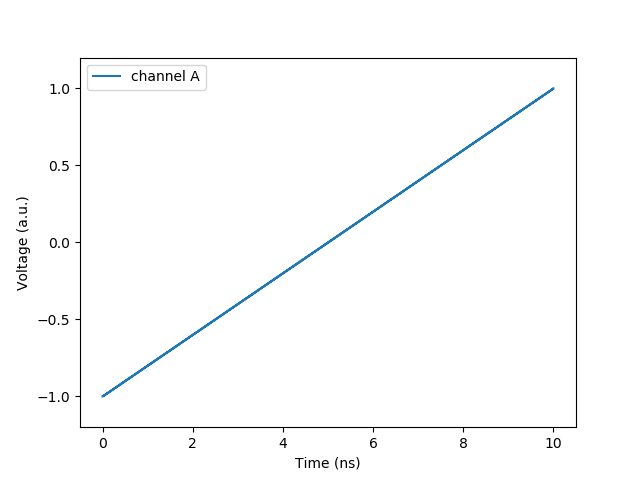

In [1]:
%matplotlib notebook
from qupulse.pulses import TablePT
from qupulse.pulses.plotting import plot

table_pulse = TablePT({'A': [(0,        'v_a'),
                             ('t_ramp', 'v_b', 'linear')]})
_ = plot(table_pulse, dict(t_ramp=10, v_a=-1, v_b=1), sample_rate=100)

Now, we want to restrict the ramp rate of the pulse to some maximum ramp rate `max_rate` and the ramp time to be larger than 1:

In [2]:
table_pulse = TablePT({'A': [(0,        'v_a'),
                             ('t_ramp', 'v_b', 'linear')]},
                      parameter_constraints=['Abs(v_a-v_b)/t_ramp < max_rate', 't_ramp>1'])
print(table_pulse.parameter_names)
print(table_pulse.parameter_constraints[0])
print(table_pulse.parameter_constraints[1])

{'v_a', 'max_rate', 't_ramp', 'v_b'}
Abs(v_a - v_b)/t_ramp < max_rate
t_ramp > 1


We see that the pulse got the extra parameter `max_rate`. We cannot instantiate this pulse without providing this parameter.

In [3]:
try:
    _ = plot(table_pulse, dict(t_ramp=10, v_a=-1, v_b=1), sample_rate=100)
except Exception as exception:
    print('{}: {}'.format(type(exception).__name__, exception))

ParameterNotProvidedException: No value was provided for parameter ''max_rate''.


If one of the constraints is violated an exception is raised:

In [4]:
try:
    _ = plot(table_pulse, dict(t_ramp=10, v_a=-1, v_b=1, max_rate=0.1), sample_rate=100)
except Exception as exception:
    print('{}: {}'.format(type(exception).__name__, exception))

ParameterConstraintViolation: The constraint 'Abs(v_a - v_b)/t_ramp < max_rate' is not fulfilled.
Parameters: {'v_a': -1, 'max_rate': 0.1, 't_ramp': 10, 'v_b': 1}
